# Example how to use random retrieval for distributions

In [1]:
import sys
from sgqlc.operation import Operation
from pdp_schema import pdp_schema as schema
from pdp_graphql_client_python import client

In [2]:
# fetch environment variable with PDP endpoint API address
! echo "${PDP_API}"

https://graphql-api.pdp.int.srgssr.ch/graphql


In [3]:
# show available queries
schema.Query

type Query {
  faroProgramPage(first: Int!, after: String): FaroProgramPage!
  faroPrograms(ids: [String!]!): [FaroProgram]!
  randomFaroPrograms: [FaroProgram!]!
  faroItemPage(first: Int!, after: String): FaroItemPage!
  faroItems(ids: [String!]!): [FaroItem]!
  faroItemsByPlayUrn(urns: [String!]!): [FaroItem]!
  faroItemsByPlayUrnGraphDb(urns: [String!]!): [FaroItem]!
  randomFaroItems: [FaroItem!]!
}

In [4]:
# retrieve query operations
op = Operation(schema.Query)

In [5]:
type(op)

sgqlc.operation.Operation

In [6]:
# return current query (empty)
op

query {
}

In [7]:
# select random faro item query (underscore)
faro = op.random_faro_items()

In [8]:
# return current query (empty)
op

query {
  randomFaroItems {
    id
    programId
    itemNr
    rights
    isPoisonous
    playMedias {
      id
      title
      urn
      description
    }
    mediaUrns
    playLinks
    descriptorPaths
    program {
      id
      bu
      mediaType
      episodeIds
      sTit
      sDatStart
      sGef
      pTit
      department
      workgroup
      seriesNr
    }
    bTit
    recordingDate
    ingestDate
    prodTypes
    producer
    licenseHolder
    abs
    fdes
    sportDoc {
      season
      sportEventPaths
      sportPaths
    }
    webCmsIds
  }
}

In [9]:
# return current query
op

query {
  randomFaroItems {
    id
    programId
    itemNr
    rights
    isPoisonous
    playMedias {
      id
      title
      urn
      description
    }
    mediaUrns
    playLinks
    descriptorPaths
    program {
      id
      bu
      mediaType
      episodeIds
      sTit
      sDatStart
      sGef
      pTit
      department
      workgroup
      seriesNr
    }
    bTit
    recordingDate
    ingestDate
    prodTypes
    producer
    licenseHolder
    abs
    fdes
    sportDoc {
      season
      sportEventPaths
      sportPaths
    }
    webCmsIds
  }
}

In [10]:
# constants
page_requests = 100

In [11]:
# init results
results = []

In [12]:
# download data
from tqdm.notebook import tnrange
for i in tnrange(page_requests, desc="Downloading data"):
    # query page
    data = client.run_query(op)
    
    # add results
    results += (op + data).random_faro_items

In [13]:
print(f'INFO - Retrieved {len(results):,} FaroItems')

INFO - Retrieved 1,000 FaroItems


## plot year distribution of retrieved data

In [14]:
results[0].program.s_dat_start

In [15]:
from collections import Counter
from datetime import date

# count year occurrences
c = Counter(date.fromisoformat(x.program.s_dat_start).year for x in results if x.program.s_dat_start)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

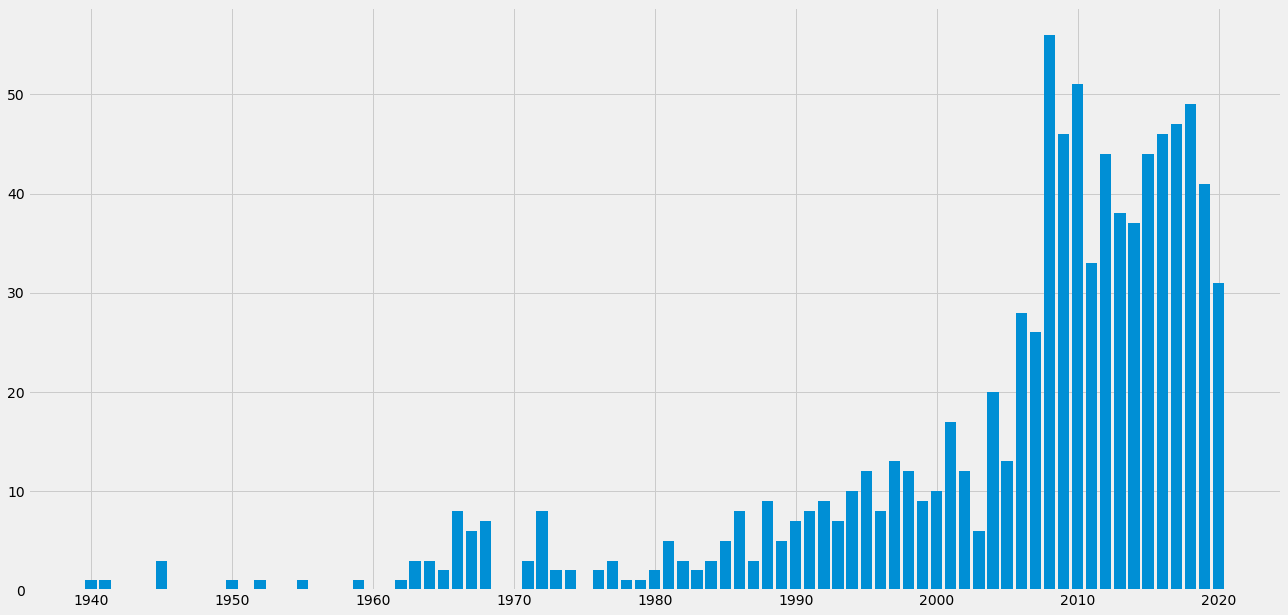

In [17]:
with plt.style.context('fivethirtyeight'):
    plt.bar(c.keys(), c.values())

## load data into pandas

In [18]:
import pandas as pd

In [19]:
results[0].__fields_cache__

OrderedDict([('id', id: String!),
             ('program_id', programId: String!),
             ('item_nr', itemNr: Int!),
             ('rights', rights: String!),
             ('is_poisonous', isPoisonous: Boolean!),
             ('play_medias', playMedias: [PlayMedia!]!),
             ('media_urns', mediaUrns: [String!]!),
             ('play_links', playLinks: [String!]!),
             ('descriptor_paths', descriptorPaths: [String!]!),
             ('program', program: FaroProgram),
             ('b_tit', bTit: String),
             ('recording_date', recordingDate: String),
             ('ingest_date', ingestDate: String),
             ('prod_types', prodTypes: [String!]!),
             ('producer', producer: String),
             ('license_holder', licenseHolder: String),
             ('abs', abs: String),
             ('fdes', fdes: String),
             ('sport_doc', sportDoc: FaroSportDoc!),
             ('web_cms_ids', webCmsIds: [String!]!)])

In [20]:
# todo: find better way to import data into pandas
df = pd.DataFrame([x.__json_data__ for x in results])

In [21]:
df

,program,mediaUrns,fdes,bTit,ingestDate,isPoisonous,descriptorPaths,itemNr,rights,prodTypes,playLinks,sportDoc,recordingDate,id,webCmsIds,programId,abs,licenseHolder,producer,playMedias
0,"{'sGef': None, 'sTit': None, 'mediaType': 'vid...",[],None,Rushes Fracht West,None,False,"[¦VERKEHR.¦GÜTERVERKEHR¦, ¦VERKEHR.¦FLUGHAFEN¦...",0,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,a515c1d3-0d70-4028-a98f-58172e472096,[],fd7c4968-84a8-45c0-99b8-56854a988e47,"Schweiz <Zürich Flughafen, ZH: Innenaufnahmen ...",SRF,SRF,[]
1,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF 1 20.03.2017 07 - 08 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,a515c8bd-a949-422b-88f7-99d5aea1f595,[],7009e231-3c80-46e2-9d98-4dd1810d7e8d,None,None,None,[]
2,"{'sGef': 'Time out', 'sTit': None, 'mediaType'...",[],None,Studiointerview Sauber\/Surer,None,False,[],1,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,a515c8bf-9656-4c59-b01d-982e327fe825,[],fec9da21-fb48-4085-bc5c-c4d4e0b03f9f,Schweiz <o.O.: Automobil \/ Studio-Interview m...,None,DRS,[]
3,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF 4 News 20.12.2010 14 - 15 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,a515cc5a-74ad-4ae6-9245-9decae8f458d,[],27687f14-d024-4a6c-97be-5200d52d3f9d,None,None,None,[]
4,"{'sGef': 'OS-Magazin', 'sTit': None, 'mediaTyp...",[],None,OS Albertville,None,False,[],9,freie Verwendung SRG-intern,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': ['¦int¦Oly...",None,a515cf5d-366c-4e39-aa2c-501f9b47fbdb,[],7c59a8c1-bf14-481a-ba97-574641b3cbf5,Frankreich <Albertville: OS Winter-Spiele 1992...,None,SRG / ORTO 92,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF 3 14.08.2009 15 - 16 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,f13722e9-4226-487e-86bd-5a8a33923912,[],cc8cd8ae-6d59-43d8-a414-faf1f28b0f35,None,None,None,[]
996,"{'sGef': 'MittagsMagazin (MM)', 'sTit': None, ...",[],None,Donghua Li,None,False,[¦KULTUR.¦MUSIK¦U-MUSIK¦],7,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,f137247f-02c2-4677-a46f-f02eec980645,[],578d1cc0-8298-4f1a-9df5-38309a866ba1,Schweiz <o.O.: Donghua Li startet Karriere als...,None,DRS,[]
997,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],[Aufnahmeort]: Bern (Gurtenfestival),"Musikinterview 2014: Family of the Year, Gurte...",None,False,"[¦KULTUR.¦MUSIK¦POP¦, ¦KULTUR.¦MUSIK¦]",0,Rechte nicht bekannt,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,f13737b7-8ac9-4da1-a79e-219bf582f720,[],91fa35c2-1007-4e90-bd94-c35c89a0928a,Übersicht:\r\nInterview mit Keyboarderin Chris...,None,None,[]
998,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF Virus 29.07.2015 03 - 04 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,f1373b8e-b3fc-4668-bd4d-8a42f165cb32,[],666dfeb4-dd53-4736-9b92-5f6a366b4ae0,None,None,None,[]


## filter out most important producers and plot as pie chart

In [22]:
df.producer.describe()

count     475
unique     99
top       SRF
freq      126
Name: producer, dtype: object

<AxesSubplot:ylabel='producer'>

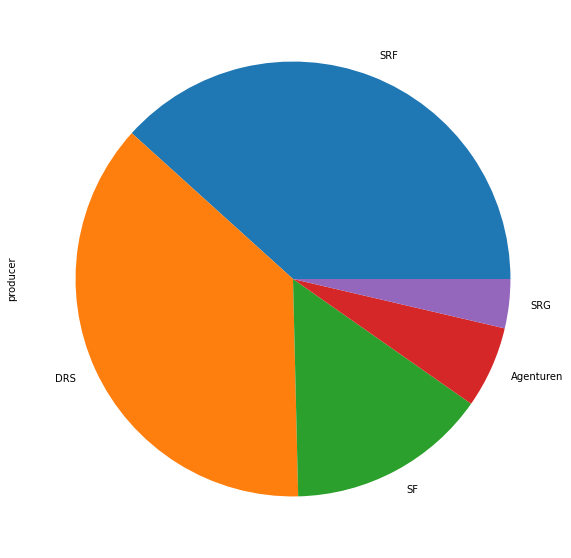

In [23]:
(df
 .groupby('producer')
 .filter(lambda x: len(x) > 10)
 .producer
 .value_counts()
 .plot
 .pie())

## filter out elements that contain the sportDoc entry

In [24]:
df2 = df.loc[pd.json_normalize(df.sportDoc).season.notna()]

In [25]:
df2

,program,mediaUrns,fdes,bTit,ingestDate,isPoisonous,descriptorPaths,itemNr,rights,prodTypes,playLinks,sportDoc,recordingDate,id,webCmsIds,programId,abs,licenseHolder,producer,playMedias
40,"{'sGef': 'Sport Live', 'sTit': None, 'mediaTyp...",[],None,Wintersport Eishockey int Victoria Cup ZSC Lio...,None,False,[],8,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': '2009', 'sportEventPaths': ['¦int¦V...",None,1dedc9d0-84c3-4e68-abf5-56066cce8402,[],bcccb6af-ae2a-4321-a7e2-c4341bffede9,"Schweiz <Zürich, ZH: Wintersport Eishockey int...",SF,SF,[]
58,"{'sGef': 'Sport Live', 'sTit': None, 'mediaTyp...",[],None,Fusball int Champions League Final Inter Maila...,None,False,[],1,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[],"{'season': '2009-2010', 'sportEventPaths': ['¦...",None,470bf366-0d6e-44a2-b695-dbbba5b6b03e,[],3ef51091-a5bc-4f58-98b6-4732a00fdf90,o.O.: Fussball int Europacup Champions League ...,unbekannt,SF,[]
82,"{'sGef': 'Sport aktuell (Spak)', 'sTit': None,...",[urn:srf:video:02790172-d0dd-46ac-b5f3-5958643...,None,Ski Nordisch Doppel-Verfolgung 10km+10km int W...,None,False,[],4,"Fremdrechte/ unklare Rechtesituation, Rechte b...",[Eigenproduktion UE],[http://srf.ch/play/tv/redirect/detail/0279017...,"{'season': '2008-2009', 'sportEventPaths': ['¦...",None,8e6f997b-80ff-4504-8f63-20ccd46f16f1,[],c47004bf-5a78-450d-831f-3667f89cb3aa,Schweden <Falun: Ski Nordisch Langlauf Doppel-...,SF; unbekannt,SF,[]
104,"{'sGef': 'OS-Magazin', 'sTit': None, 'mediaTyp...",[],None,Judo Olympia Final \/ Sieg Majlinda Kelmendi,None,False,[],7,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[],"{'season': '2016', 'sportEventPaths': ['¦int¦O...",None,d6c6bdfc-c333-4aae-8e88-94fd2534e131,[],7b01709c-fa42-4ae0-b2fb-c2ff6477196b,Brasilien <Rio de Janeiro: Kampfsport Judo int...,unbekannt,SRF,[]
144,"{'sGef': 'Sportpanorama (Pano)', 'sTit': None,...",[urn:srf:video:26994865-20ff-4d5a-bb0c-340de54...,None,Automobil Formel 1 GP Abu Dhabi,None,False,[],0,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[http://srf.ch/play/tv/redirect/detail/2699486...,"{'season': '2017', 'sportEventPaths': ['¦int¦F...",None,733feb35-918d-4a0b-a73d-68112af821e6,[26994865-20ff-4d5a-bb0c-340de54bea73],17481458-68b4-414a-b578-4463ff2b8ee0,Vereinigte Arabische Emirate <Abu Dhabi: Autom...,unbekannt,SRF,[]
182,"{'sGef': 'Sport aktuell (Spak)', 'sTit': None,...",[urn:srf:video:e375e8ee-ed39-41c9-ac94-c1c7ca5...,None,Fussball Champions League Sechzehntelfinal FCZ...,None,False,[],3,Rechte bei SRF/SRG,[Eigenproduktion UE],[http://srf.ch/play/tv/redirect/detail/e375e8e...,"{'season': '2016-2017', 'sportEventPaths': ['¦...",None,d6453964-c132-410d-8af8-2be09f36ee87,[e375e8ee-ed39-41c9-ac94-c1c7ca5ef52e],c39c8115-1acc-4df3-89fe-b992b8cc8e55,"Schweiz <Zürich, ZH: Fussball int Europacup Ch...",SRF,SRF,[]
237,"{'sGef': 'Sport Live Multi', 'sTit': None, 'me...",[],None,Kurzstreckenlauf 100m Weltmeisterschaft Vorlau...,None,False,[],1,Fremdrechte/ unklare Rechtesituation,[Übernahme / Programmaustausch],[],"{'season': '2019', 'sportEventPaths': ['¦int¦W...",None,4da09b64-85e2-4707-b1ec-9cd80b44c730,[],59fcc6e5-04ff-49fb-83fd-4734d58dda92,Katar <Doha: Leichtathletik Kurzstreckenlauf 1...,unbekannt,IAAF,[]
239,"{'sGef': 'Sport Live Programm', 'sTit': None, ...",[],None,"Wintersport Eishockey Playoff \/ Serie \""Legen...",None,False,[],7,freie Verwendung SRG-intern,[Eigenproduktion UE],[],"{'season': '2018-2019', 'sportEventPaths': ['¦...",None,4da0a70c-e945-4fb3-9483-2cf54da77928,[],5eb53938-4d6c-4126-a72a-1746d75faf39,"Schweiz, Biel-Bienne, BE, o.O.: Wintersport Ei...",SRG,SRF,[]
242,"{'sGef': 'Sport Live Programm', 'sTit': None, ...",[],None,Wintersport Eishockey Weltmeisterschaft Vorrun...,None,False,[],1,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': '2018', 'sportEventPaths': ['¦int¦W...",None,f2c62bcc-d93b-497a-93e2-186a136a980f,[],2ca10a64-e201-4a50-9f29-7e7b43efed61,"Schweiz, TVZH, Dänemark, Kopenhagen: Winterspo...",SRF,SRF,[]
264,"{'

In [26]:
df2.bTit

40     Wintersport Eishockey int Victoria Cup ZSC Lio...
58     Fusball int Champions League Final Inter Maila...
82     Ski Nordisch Doppel-Verfolgung 10km+10km int W...
104         Judo Olympia Final \/ Sieg Majlinda Kelmendi
144                      Automobil Formel 1 GP Abu Dhabi
182    Fussball Champions League Sechzehntelfinal FCZ...
237    Kurzstreckenlauf 100m Weltmeisterschaft Vorlau...
239    Wintersport Eishockey Playoff \/ Serie \"Legen...
242    Wintersport Eishockey Weltmeisterschaft Vorrun...
264                                             Fussball
372     Tennis Hopmancup Round Robin \/ Junge Generation
401    Team Schweiz-Trainingslager in Crans Montana u...
424    Fussball Champions League Vorrunde Borussia Do...
435    Tennis Wimbledon Halbfinal \/ Führung Zeremoni...
457    Fussball int Testspiel Schweiz - Zypern \/ 1. ...
464          Fussball \/ Interview Studiogast Jörg Stiel
467    Fussball Schweizermeisterschaft Sion - Basel \...
473    Fussball Champions Leagu

<AxesSubplot:ylabel='index'>

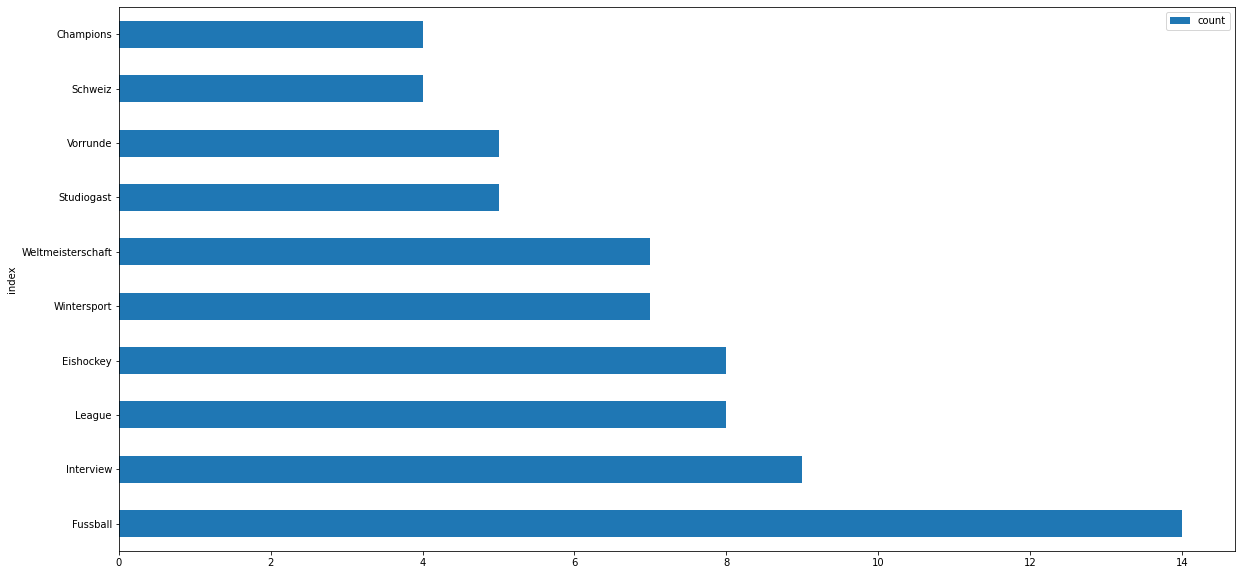

In [27]:
# Top 10 Keywords
(df2
 .bTit
 .str.get_dummies(sep=" ")               # split all titles by space and get occurrences as dummy pairs (word:0/1)
 .sum()                                  # sum word occurrences 
 .to_frame()                             # convert series to dataframe
 .reset_index()                          # reset index to get index as str
 .rename(columns = {0:'count'})          # rename 
 .query('index.str.istitle()')           # filter out all capitalized words
 .sort_values('count', ascending=False)  # sort by occurrence
 .head(10)                               # pick top 10
 .plot.barh(x='index', y='count')        # plot bar chart
)